In [1]:
# Fashion MNIST Clothing Classification
# The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

# It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [3]:
# Number of classes - do not change unless the data changes
num_classes = 10

In [4]:
# sizes of batch and # of epochs of data
batch_size = 64
epochs = 24

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

In [6]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
len(y_train)

60000

In [9]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


In [12]:
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2])   # verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


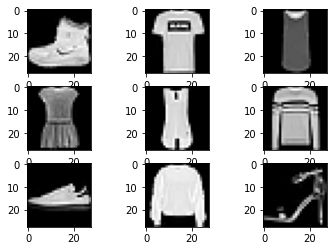

In [13]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [14]:
# Define the model
model = Sequential()

In [15]:
num_classes

10

In [16]:
# Create a CNN to classify the images
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
#   define compile to minimize categorical loss, use adam optimized, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/24
938/938 [==============================] - 21s 21ms/step - loss: 0.5392 - accuracy: 0.8046 - val_loss: 0.3962 - val_accuracy: 0.8520
Epoch 2/24
938/938 [==============================] - 21s 22ms/step - loss: 0.3493 - accuracy: 0.8742 - val_loss: 0.3364 - val_accuracy: 0.8770
Epoch 3/24
938/938 [==============================] - 21s 22ms/step - loss: 0.3028 - accuracy: 0.8891 - val_loss: 0.3333 - val_accuracy: 0.8795
Epoch 4/24
938/938 [==============================] - 21s 22ms/step - loss: 0.2731 - accuracy: 0.8984 - val_loss: 0.3024 - val_accuracy: 0.8895
Epoch 5/24
938/938 [==============================] - 21s 22ms/step - loss: 0.2498 - accuracy: 0.9076 - val_loss: 0.3029 - val_accuracy: 0.8910
Epoch 6/24
938/938 [==============================] - 21s 22ms/step - loss: 0.2285 - accuracy: 0.9161 - val_loss: 0.2644 - val_accuracy: 0.9026
Epoch 7/24
938/938 [==============================] - 21s 23ms/step - loss: 0.2119 - accuracy: 0.9216 - val_loss: 0.2752 - val_accuracy:

Test loss: 0.4719970226287842
Test accuracy: 0.8981000185012817


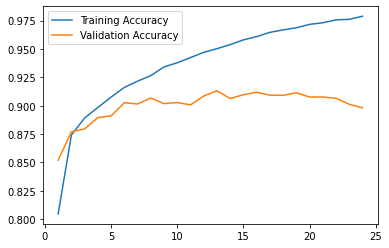

In [18]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [19]:
#model summary
model.summary()

# Input image shape: 28*28*1
# Filters: 32

# '''Explanation of the parameter calculation

# Convolution: 3*3 matrix --> 28*28 image gets converted into 26*26
# Pooling: 13*13

# Convolution: 3*3 matrix --> 13*13 (cuts down further 2 pixels) --> 11*11*32
# Pooling: 5*5*32

# Flattening: 800

# ((shape of width of filter X shape of height filter X number of filters in the previous layer+1) 
# X number of filters)

# (3*3+1)*32 = 320

# (3*3*32+1)*32 = 289*32 = 9248

# 128*800 + 128 = 102528  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Parameters in a Conv layer:

# ((shape of width of filter X shape of height filter X number of filters in the previous layer+1) X number of filters)

# Parameters in the FC layer🇰

# ((current layer c X previous layer p)+1 X c)

# In keras, non-trainable parameters (as shown in model.summary()) means the number of weights that are not updated during training with backpropagation.

# If you don't want to train: trainable=False

# Understand the logic behind parameters:

# https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

In [ ]:
# Save neural network structure
from pathlib import Path
model_structure = model.to_json()
f = Path("cnn_mnist_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("cnn_mnist_model_weights.h5")

In [ ]:
model.save("C:/Users/DELL/Documents/DL Lab")